<a href="https://colab.research.google.com/github/DenisRagulin/1lab/blob/main/1_laba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Добавление библиотек

In [ ]:
# наикраше место
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as sps
import ipywidgets as widgets
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import tree

# Генерация классов случайных чисел с биномиальным распределением

In [ ]:
# тут просто возьми свое распределение вместо биномиального и нужное количество классов (у меня 5)
c1 = np.random.binomial(100, 0.5, (2,300))
c2 = np.random.binomial(100, 0.5, (2,300)) + 50
c3 = np.random.binomial(100, 0.5, (2,300)) + 100
c4 = np.random.binomial(100, 0.5, (2,300)) + 150
c5 = np.random.binomial(100, 0.5, (2,300)) + 200

# Объединение массивов точек

In [ ]:
# конкатенате странно работает (это то, что мы с Осиповой починить не могли на паре), но в общем и целом он склеивает n массивов в один
xs = np.concatenate((c1[0],c2[0],c3[0],c4[0],c5[0]))
ys = np.concatenate((c1[1],c2[1],c3[1],c4[1],c5[1]))

# График matplotlib

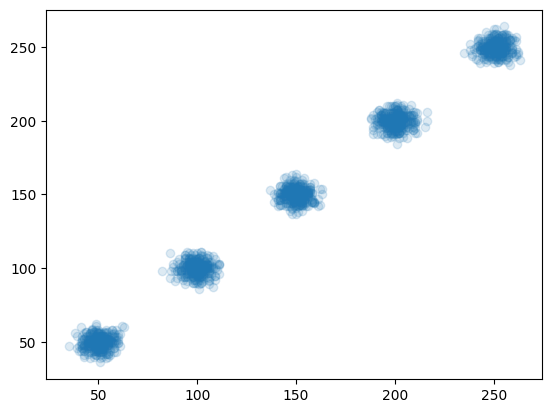

In [ ]:
# график (дракула)
plt.scatter(xs, ys, alpha=0.15)

# График Plotly Express

In [ ]:
# график (влад цепеш)
xsys = np.concatenate((xs.reshape(-1,1),ys.reshape(-1,1)), axis=1) # xsys объединяет координаты в один массив, аксис это ось конкатенации, я хз как она работает
fig = px.scatter(xsys, x=0, y=1, width=900, height=900, title='Биномиальное распределение', opacity=0.30)
fig.show()

In [ ]:
Y = [[] for i in range(1500)]
for i in range (0,300):
  Y[i] = 0
for i in range (300,600):
  Y[i] = 1
for i in range (600,900):
  Y[i] = 2
for i in range (900,1200):
  Y[i] = 3
for i in range (1200,1500):
  Y[i] = 4

# Метод К средних

In [ ]:
# этот метод кластеризует (делит на кластеры) все точки
kmeans = KMeans(n_clusters=5, init='k-means++', n_init='auto').fit(xsys) # в n_clusters указать количество кластеров
label = kmeans.fit_predict(xsys) # создаем массив в котором указано какому кластеру принадлежит точка
print(label)

[3 3 3 ... 4 4 4]


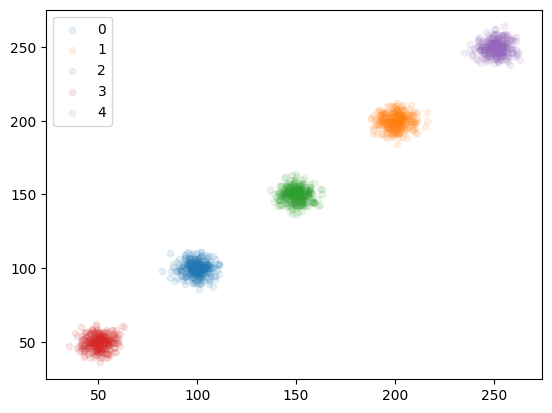

In [ ]:
 u_labels = np.unique(label) # находим все номера кластеров
for i in u_labels: # в цикле строим кластеры
    plt.scatter(xsys[label == i , 0], xsys[label == i , 1] , label = i, alpha=0.1, s=20)
plt.legend() # радуга! :D
plt.show() # итог

# Отображение центроидов

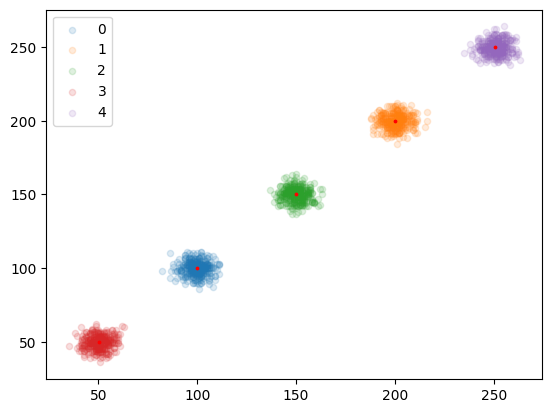

In [ ]:
centroids = kmeans.cluster_centers_ # находим центроиды (центры масс кластера)
for i in u_labels: # строим кластеры (опять)
    plt.scatter(xsys[label == i , 0] , xsys[label == i , 1] , label = i, alpha=0.15, s=20)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 3, color = 'red') # отметим центроиды
plt.legend()
plt.show()

# Метод дерева решений

In [ ]:
df_cluster_centers = pd.DataFrame(centroids)
print(df_cluster_centers)

            0           1
0   99.676667   99.936667
1  200.266667  199.810000
2  149.923333  150.000000
3   50.296667   49.686667
4  250.753333  249.750000


[Text(0.375, 0.875, 'x[0] <= 72.5\ngini = 0.8\nsamples = 1500\nvalue = [300, 300, 300, 300, 300]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 300\nvalue = [0, 0, 0, 300, 0]'),
 Text(0.5, 0.625, 'x[1] <= 174.0\ngini = 0.75\nsamples = 1200\nvalue = [300, 300, 300, 0, 300]'),
 Text(0.25, 0.375, 'x[0] <= 124.0\ngini = 0.5\nsamples = 600\nvalue = [300, 0, 300, 0, 0]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 300\nvalue = [300, 0, 0, 0, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 300\nvalue = [0, 0, 300, 0, 0]'),
 Text(0.75, 0.375, 'x[1] <= 225.0\ngini = 0.5\nsamples = 600\nvalue = [0, 300, 0, 0, 300]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 300\nvalue = [0, 300, 0, 0, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 300\nvalue = [0, 0, 0, 0, 300]')]

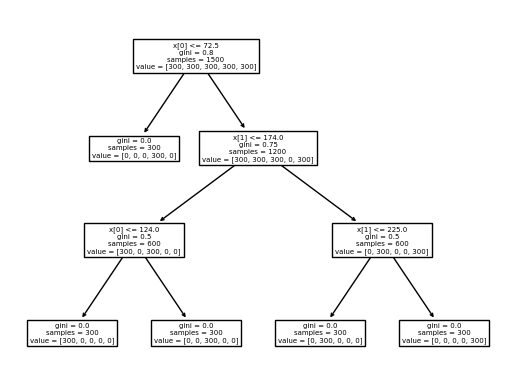

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(xsys,label)
tree.plot_tree(clf)

# Нормализация

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xsys_n=pd.DataFrame(sc.fit_transform(xsys))
xsys_n.describe()

,0,1
count,1500.000000,1.500000e+03
mean,0.000000,-7.579123e-17
std,1.000334,1.000334e+00
min,-1.620183,-1.606073e+00
25%,-0.748083,-7.454498e-01
50%,-0.002579,2.304400e-03
75%,0.742926,7.500586e-01
max,1.586893,1.610681e+00


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xsys_n, Y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_train=clf.predict(X_train)
print(confusion_matrix(y_train,y_pred_train))
print(accuracy_score(y_train, y_pred_train))

[[  0   0   0 208   0]
 [  0   0   0 197   0]
 [  0   0   0 212   0]
 [  0   0   0 186   0]
 [  0   0   0 202   0]]
0.18507462686567164


# Персептрон Розенблатта

**Персептрон Розенблатта** - один нейрон. В один момент на этот перспетрон может прийти только одно наблюдение из этой выборки.

**Персептрон Розенблатта** состоит из сумматора и нелинейного преобразователя с функцией активации. Функция активации: если больше 0, выход 1, если меньше 0, выход 0. Персептрон может разделять только на два класса.

Такая архитектура позволяет строить разделяющую линию с уравнением: матрица весов * вектор P.

P1 и P2 отвечает за наклон разделяющей линии персептрона Розелблатта, b и $w$1 отвечают за смещение по оси P1.



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
xsys_n=pd.DataFrame(sc.fit_transform(xsys))
xsys_n.describe()


,0,1
count,1500.000000,1500.000000
mean,0.505190,0.499284
std,0.311914,0.310976
min,0.000000,0.000000
25%,0.271930,0.267544
50%,0.504386,0.500000
75%,0.736842,0.732456
max,1.000000,1.000000


In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.aclivation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.aclivation_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.aclivation_func(linear_output)
        return y_predicted
#функция активации (если результат сумматора >= 0, то результат = 1)
    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [ ]:
pt = Perceptron(n_iters=10)
X_train = np.array(X_train).reshape((-1,3))
pt.fit(X_train,y_train)
print(pt.bias)
print(pt.weights)

0.03
[-0.00680686  0.01354874 -0.00449379]


In [ ]:
x_test = np.array(x_test).reshape((-1,3))
y_pred_test = net.predict(x_test)
import plotly.graph_objects as go
def f(x,y,net):
  return (-net.bias-x*net.weights[0]-y*net.weights[1])/net.weights[2]
x11 = np.linspace(-1,0,num=100)
x21 = np.linspace(-1,0,num=100)
x21,x22 = np.meshgrid(x11,x21)
x31=f(x21,x22,net)
fig = go.Figure(data=[
go.Scatter3d(
    x=x_test[:,0], y=x_test[:,1],z = x_test[:,2], mode='markers', marker = dict(size = 4, color = y_pred_test)),
go.Scatter3d(
  x = x21.flatten(),
  y = x22.flatten(),
  z = x31.flatten(),
  mode = 'markers',
  marker = dict(size = 4, color = 'red')
)])
fig.show()

In [ ]:
X_test = np.array(X_test).reshape((-1,3))
y_pred_test = pt.predict(X_test)
import plotly.graph_objects as go
def f(x,y,pt):
    return (-pt.bias-x*pt.weights[0]-y*pt.weights[1])/pt.weights[2]
x11 = np.linspace(0,1,num=100)
x21 = np.linspace(0,1,num=100)
x21,x22 = np.meshgrid(x11,x21)
x31 = f(x21,x22,pt)
fig = go.Figure(data=[
    go.Scatter(
        x=X_test[:,0], y=X_test[:,1], mode='markers', marker=dict(size=4, color=y_pred_test)),
    go.Scatter(
        x=x21.flatten(),
        y=x22.flatten(),
        mode='markers',
        marker=dict(size=4,color='red')
    )])
fig.show()

# ДОДЕЛАТЬ

In [ ]:
class KohonenNet():
    def __init__(self, m=3, n=3, lr=1, sigma=1, max_iter=3000, weights = []):
        self.m = m #количество классов
        self.n = n #количество уровней сети
        self.shape = (m, n)
        self.initial_lr = lr
        self.lr = lr #скорость обучения
        self.sigma = sigma #параметр изменения скорости обучения (она будет снижаться с каждой итерацией)
        self.max_iter = max_iter

        self.weights = weights

#функция нахождения выйгравшего нейрона (нейрона с минимальным расстоянием до точки)
    def _find_bmu(self, x):
        x_stack = np.stack([x]*(self.m*self.n), axis=0)#матрица размером [количество центров кластеров(нейронов), количество признаков] (для каждого веса своя строка признаков(точка))
        distance = np.linalg.norm(x_stack - self.weights, axis=1)#эвклидовы расстояния между точкой выборки и нейронами
        return np.argmin(distance)#возвращаем индекс минимального расстояния (индекс подходящего нейрона)

    def step(self, x):
        x_stack = np.stack([x]*(self.m*self.n), axis=0)#матрица размером [количество весов, количество признаков] (для каждого веса своя строка признаков(точка))

        bmu_index = self._find_bmu(x)#передаем в функцию строку признаков (точку) и получаем индекс выйгравшего нейрона (центра кластера)
        self.weights[bmu_index] += self.lr * (x - self.weights[bmu_index])

    #обучение весов
    def fit(self, X, epochs=1, shuffle=True):
        global_iter_counter = 0
        n_samples = X.shape[0]#количество элементов выборки
        total_iterations = np.minimum(epochs * n_samples, self.max_iter)#количество обучения весов в эпохе

        for epoch in range(epochs):#изначально у нас 1 эпоха
            if global_iter_counter > self.max_iter:#не даем проводить больше 3000 эпох
                break

            if shuffle:
                indices = np.random.permutation(n_samples)#создание массива с индексами в разброс
            else:
                indices = np.arange(n_samples)#создание массива с индексами по порядку

            #обучение
            for idx in indices:#проход по выборке с индексами idx
                if global_iter_counter > self.max_iter:
                    break
                input = X[idx]
                #перемещение нейрона(изменение весов победившего нейрона)
                self.step(input)

                global_iter_counter += 1
                self.lr = (1 - (global_iter_counter / total_iterations)) * self.initial_lr#изменение параметра обучения

        self._n_iter_ = global_iter_counter

        return

    def returnChangedWeights(self):
      return self.weights

    def predict(self, X):
        labels = np.array([self._find_bmu(x) for x in X])
        return labels


In [ ]:
# сеть Кохонена
kohonen_net=KohonenNet(m=3,n=1,weights=centroids)
y_pred_test=kohonen_net.predict(X_test)
import plotly.graph_objects as go
fig = go.Scatter(
    x=X_test[:,0], y=X_test[:,1],mode='markers',marker=dict(size=2, color=y_pred_test)
),
go.Scatter(
    x=df_cluster_centers[0],
    x=df_cluster_centers[1],
    mode='markers',
    marker=dict(size=4,color='red')
)

ValueError: operands could not be broadcast together with shapes (3,3) (5,2) 

In [ ]:
df_cluster_centers=pd.DataFrame(kohonen_net.weigths)
print(df_cluster_centers)

AttributeError: 'KohonenNet' object has no attribute 'weigths'

# Вероятностная нейронная сеть
> *У кого больше вероятность, тот и победил* (C)

Для каждого наблюдления создается нейрон в скрытом слое. Обучается с учителем (будем подавать не только X_train, но и Y_train. Будем сообщать, к какому классу относится наблюдение.

Имеется 3 признака: $p1,p2,p3$. 30% наблюдений уходит в тренировочный набор, остальное в обучающем.

В каждом кружочке (количество кружочков равно числу наблюдений) находится функция активации (**Гауссовская** ядерная функция). Суммирование идет с учетом того, к какому классу принадлежит наблюдение.
$X_{c_2|c_2|}$, где $c_2$ это класс наблюдения, а $|c_2|$ это мощность (?)

In [ ]:
num_correct =
#в num_correct идет сравнение с правильными ответами и вычисляется процент правильных ответов

SyntaxError: invalid syntax (<ipython-input-27-f00cb98153fc>, line 1)

In [ ]:

pnn = PNN()

NameError: name 'PNN' is not defined

Кросс валидация - перекрестная проверка (не всей выборки, а определенного числа наблюдений)
